In [2]:
import numpy as np
import pandas as pd
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk, messagebox, filedialog
from PIL import Image, ImageTk

In [3]:
# Load data
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

# Reshape data to fit standard
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [5]:
# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Added dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model with binary cross-entropy loss function
# Adam optimizer and accuracy as metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train model on training data for 25 epochs with batch size of 64
model.fit(X_train, Y_train, epochs=25, batch_size=64)

# Evaluate model's performance on test set, returns loss value and accuracy on test data
model.evaluate(X_test, Y_test)

Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 375ms/step - accuracy: 0.5486 - loss: 0.6957
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 443ms/step - accuracy: 0.5344 - loss: 0.6912
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 488ms/step - accuracy: 0.5486 - loss: 0.6895
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 515ms/step - accuracy: 0.5819 - loss: 0.6657
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 541ms/step - accuracy: 0.6598 - loss: 0.6283
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 555ms/step - accuracy: 0.6843 - loss: 0.6037
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 565ms/step - accuracy: 0.7311 - loss: 0.5612
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 570ms/step - accuracy: 0.7671 - loss: 0.5109
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 581ms/step - accuracy: 0.7804 - loss: 0.4555
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 576ms/step - accuracy: 0.8094 - loss: 0.4320
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 594ms/step - accuracy: 0.8225 - loss: 0.3904
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 20

[1.2314519882202148, 0.737500011920929]

In [7]:
def refresh_image():
    idx2 = random.randint(0, len(Y_test) - 1)
    # Clear previous plot
    for widget in frame.winfo_children():
        widget.destroy()
    # Display new image
    fig, ax = plt.subplots()
    ax.imshow(X_test[idx2, :])
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack(padx=5, pady=5)
    # Predict class of selected image
    y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
    y_pred = y_pred > 0.5
    if y_pred == 0:
        pred = 'dog'
    else:
        pred = 'cat'
    # Display prediction
    prediction_label = ttk.Label(frame, text=f"This is an image of a: {pred}", font=("Helvetica", 22))
    prediction_label.pack(padx=5, pady=5)

def input_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            img = Image.open(file_path).resize((100, 100))
            img_array = np.array(img) / 255.0

            # Check image shape
            if img_array.shape != (100, 100, 3):
                raise ValueError(f"Unexpected image shape: {img_array.shape}")

            # Clear previous plot
            for widget in frame.winfo_children():
                widget.destroy()

            # Display new image
            fig, ax = plt.subplots()
            ax.imshow(img_array)
            canvas = FigureCanvasTkAgg(fig, master=frame)
            canvas.draw()
            canvas.get_tk_widget().pack(padx=5, pady=5)

            # Predict class of selected image
            img_array = img_array.reshape(1, 100, 100, 3)
            y_pred = model.predict(img_array)
            y_pred = y_pred > 0.5
            if y_pred == 0:
                pred = 'dog'
            else:
                pred = 'cat'

            # Display prediction
            prediction_label = ttk.Label(frame, text=f"This is an image of a: {pred}", font=("Helvetica", 22))
            prediction_label.pack(padx=5, pady=5)
        except FileNotFoundError:
            messagebox.showerror("Error", "File not found. Please select a valid image file.")
        except OSError:
            messagebox.showerror("Error", "The selected file is not a valid image or is corrupted.")
        except ValueError as ve:
            messagebox.showerror("Error", f"Value error: {ve}")
        except Exception as e:
            messagebox.showerror("Error", f"An unexpected error occurred: {e}")
            print(f"Error details: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


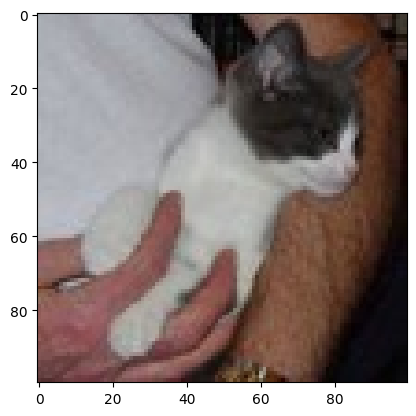

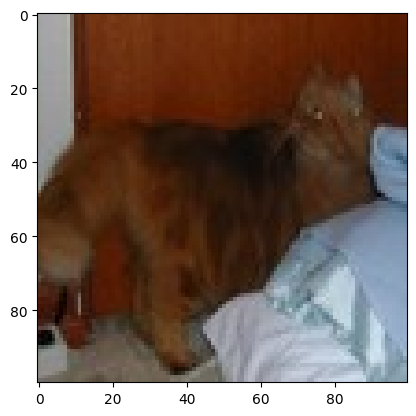

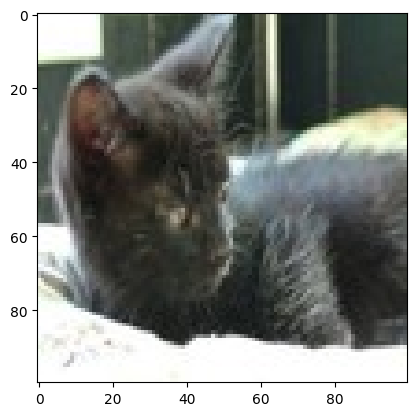

In [8]:
# Create main window
root = tk.Tk()
root.title("Image Classifier")

# Initial size of window & center it
window_width = 800
window_height = 900
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
position_top = int(screen_height / 2 - window_height / 2)
position_right = int(screen_width / 2 - window_width / 2)
root.geometry(f"{window_width}x{window_height}+{position_right}+{position_top}")

# Labels
title_label = ttk.Label(root, text="Image Classification", font=("Helvetica", 36, "bold italic"))
title_label.pack(pady=10)
authors_label = ttk.Label(root, text="by Daniel Ho & Sean Solomon", font=("Helvetica", 12))
authors_label.pack(pady=5)

# Frame for button and image
frame = ttk.Frame(root, padding="10")
frame.pack(expand=True)

# Add a button to refresh image
style = ttk.Style()
style.configure("TButton", foreground="blue", font=("Helvetica", 22, "italic"), padding=10)
refresh_button = ttk.Button(root, text="Refresh Image", command=refresh_image, style="TButton")
refresh_button.pack(expand=True, anchor=tk.CENTER, padx=5, pady=5)

# Add a button to input image from user
input_button = ttk.Button(root, text="Upload Image", command=input_image, style="TButton")
input_button.pack(expand=True, anchor=tk.CENTER, padx=5, pady=5)

# Start GUI event loop
root.mainloop()